# MOVIE INDUSTRY ANALYSIS (1980-2020)

In [73]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import ticker
from scipy.stats import linregress
import warnings
warnings.filterwarnings('ignore')

In [74]:
#import data
df=pd.read_csv(r"C:\Users\ajoal\OneDrive\Desktop\movie.csv")
df1=df

In [75]:
df1.head()

,name,rating,genre,released,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980-06-13,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980-07-02,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980-06-20,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980-07-02,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980-07-25,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [76]:
#Basic Information
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   released  7666 non-null   object 
 4   votes     7665 non-null   float64
 5   director  7668 non-null   object 
 6   writer    7665 non-null   object 
 7   star      7667 non-null   object 
 8   country   7665 non-null   object 
 9   budget    5497 non-null   float64
 10  gross     7479 non-null   float64
 11  company   7651 non-null   object 
 12  runtime   7664 non-null   float64
dtypes: float64(4), object(9)
memory usage: 778.9+ KB


In [77]:
#Number of rows and columns
df1.shape

(7668, 13)

## Data Cleaning

In [78]:
#Check for duplicates
df1[df1.duplicated()]

,name,rating,genre,released,votes,director,writer,star,country,budget,gross,company,runtime


In [79]:
#check for missing values
df1.isnull().sum()

name           0
rating        77
genre          0
released       2
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [80]:
#Check for missing values in budget and gross
print(df1['budget'].isnull().sum())
print(df1['gross'].isnull().sum())

2171
189


In [81]:
#Drop the rows that have missing values in budget and gross
df1 = df1.dropna(subset=['budget'])
df1 = df1.dropna(subset=['gross'])

In [82]:
#check whether it is removed
print(df1['budget'].isnull().sum())
print(df1['gross'].isnull().sum())

0
0


In [83]:
# Fill missing values in ratings and company columns with "Unknown"
df1['rating'] = df1['rating'].fillna("Unknown")
df1['company'] = df1['company'].fillna("Unknown")

In [84]:
# Fill runtime with median runtime
df1['runtime'] = df1['runtime'].fillna(df1['runtime'].median())

In [85]:
df1[df1['country'].isnull()]

,name,rating,genre,released,votes,director,writer,star,country,budget,gross,company,runtime
7615,Clinton Road,Unknown,Horror,2019-06-14,1900.0,Richard Grieco,Noel Ashman,Ace Young,NaN,2500000.0,50400.0,Growing Tree Productions,77.0


In [86]:
#Fill country of clinton road movie as united states
df1['country'] = df1['country'].fillna("United States")

In [87]:
df1[df1['name']=='Clinton Road']

,name,rating,genre,released,votes,director,writer,star,country,budget,gross,company,runtime
7615,Clinton Road,Unknown,Horror,2019-06-14,1900.0,Richard Grieco,Noel Ashman,Ace Young,United States,2500000.0,50400.0,Growing Tree Productions,77.0


In [88]:
#All missing values has been populated
df1.isnull().sum()

name        0
rating      0
genre       0
released    0
votes       0
director    0
writer      0
star        0
country     0
budget      0
gross       0
company     0
runtime     0
dtype: int64

In [89]:
#Data Types of each column
df1.dtypes

name         object
rating       object
genre        object
released     object
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [90]:
#Change the data type of budget and gross
df1['budget']=df1['budget'].astype('int64')
df1['gross']=df1['gross'].astype('int64')
df1['votes']=df1['votes'].astype('int64')

In [91]:
#Verify the change
df1.dtypes

name         object
rating       object
genre        object
released     object
votes         int64
director     object
writer       object
star         object
country      object
budget        int64
gross         int64
company      object
runtime     float64
dtype: object

In [92]:
#Convert release_date to datetime
df1['released'] = pd.to_datetime(df1['released'])

In [93]:
#Extract year and month from released
df1['release_year'] = df1['released'].dt.year
df1['release_month'] = df1['released'].dt.month_name()

In [94]:
#Drop the row where year is 1905 because it is not informative to the dataset 
df1 = df1.drop(df1[df1['release_year'] == 1905].index)

In [95]:
#Add new columns profit and roi
df1['profit'] = df1['gross'] - df1['budget']
df1['roi'] = df1['profit'] / df1['budget']

In [96]:
#New number of rows and columns
df1.shape

(5431, 17)

In [97]:
#Cleaned dataset
df1.head()

,name,rating,genre,released,votes,director,writer,star,country,budget,gross,company,runtime,release_year,release_month,profit,roi
0,The Shining,R,Drama,1980-06-13,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980,June,27998772,1.473620
1,The Blue Lagoon,R,Adventure,1980-07-02,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980,July,54353106,12.078468
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980-06-20,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980,June,520375067,28.909726
3,Airplane!,PG,Comedy,1980-07-02,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980,July,79953539,22.843868
4,Caddyshack,R,Comedy,1980-07-25,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980,July,33846344,5.641057


## Exploratory Data Analysis

### Top 10 highest grossing movies

In [98]:
#Top 10 highest grossing movies
df1.sort_values('gross', ascending=False).head(10)[['name','gross']].set_index('name')

,gross
name,
Avatar,2847246203
Avengers: Endgame,2797501328
Titanic,2201647264
Star Wars: Episode VII - The Force Awakens,2069521700
Avengers: Infinity War,2048359754
The Lion King,1670727580
Jurassic World,1670516444
The Avengers,1518815515
Furious 7,1515341399


### Top ten companies with high gross

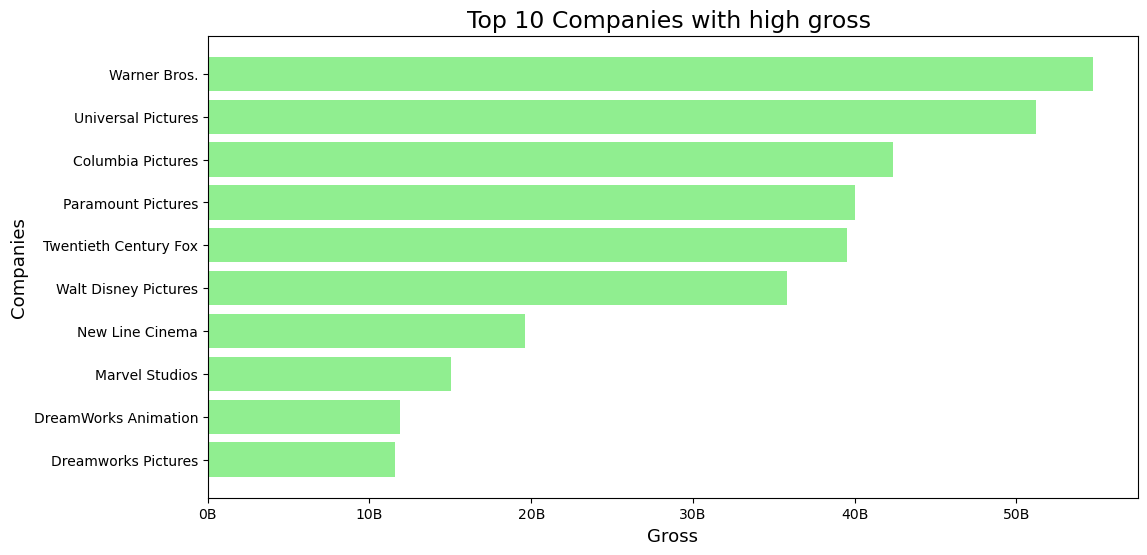

In [99]:
#Top ten companies with high gross
top_ten_companies = (
    df1.groupby('company')[['gross']]
       .sum()
       .sort_values('gross', ascending=False)
       .head(10)
)

#Barplot
plt.figure(figsize=(12,6))
plt.barh(
    top_ten_companies.index, 
    top_ten_companies['gross'], 
    color='lightgreen'
)

# Add titles and labels
plt.xlabel('Gross', fontsize=13) 
plt.ylabel('Companies',fontsize=13) 
plt.title('Top 10 Companies with high gross ',fontsize=17)

# Format x-axis in millions
plt.gca().xaxis.set_major_formatter(
    ticker.FuncFormatter(lambda x, pos: f'{x/1e9:.0f}B')
)

plt.gca().invert_yaxis()
plt.show()

### Average profit that movie industry had each year since 1980

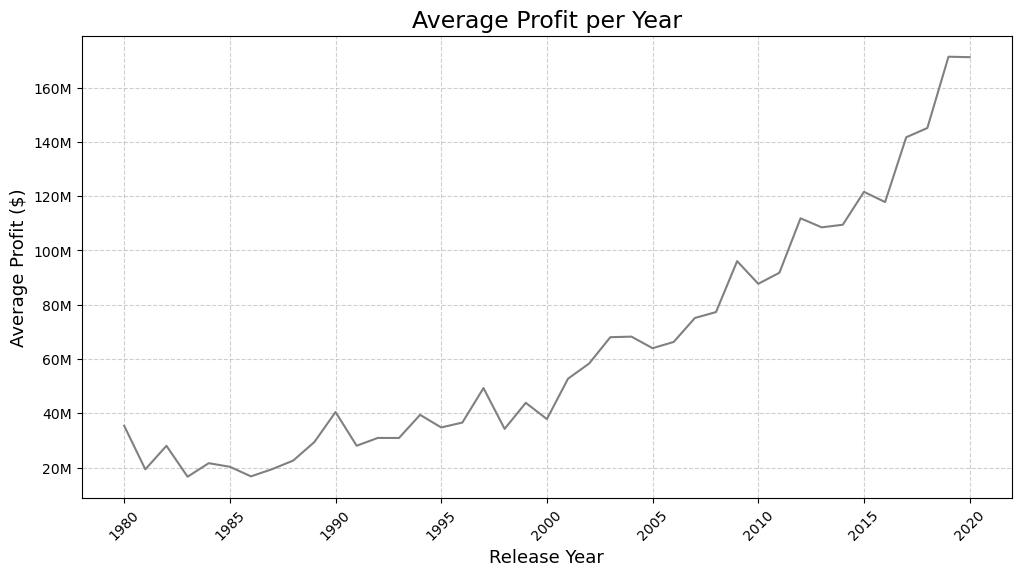

In [100]:
#Average profit that movie industry had each year since 1980

#Group by year
avg_profit_per_year = (
    df1.groupby('release_year')[['profit']]
       .mean()
)    

#Plot
plt.figure(figsize=(12,6))
plt.plot(
    avg_profit_per_year.index, 
    avg_profit_per_year['profit'], 
    color='grey'
)

# Add titles and labels   
plt.xlabel("Release Year",fontsize=13)
plt.ylabel("Average Profit ($)",fontsize=13)
plt.title("Average Profit per Year",fontsize=17)
plt.xticks(rotation=45)
plt.grid(True, linestyle="--", alpha=0.6)

# Format y-axis in millions
plt.gca().yaxis.set_major_formatter(
    ticker.FuncFormatter(lambda y, pos: f'{y/1e6:.0f}M')
)

plt.show()

### Average profit of movie industry by month

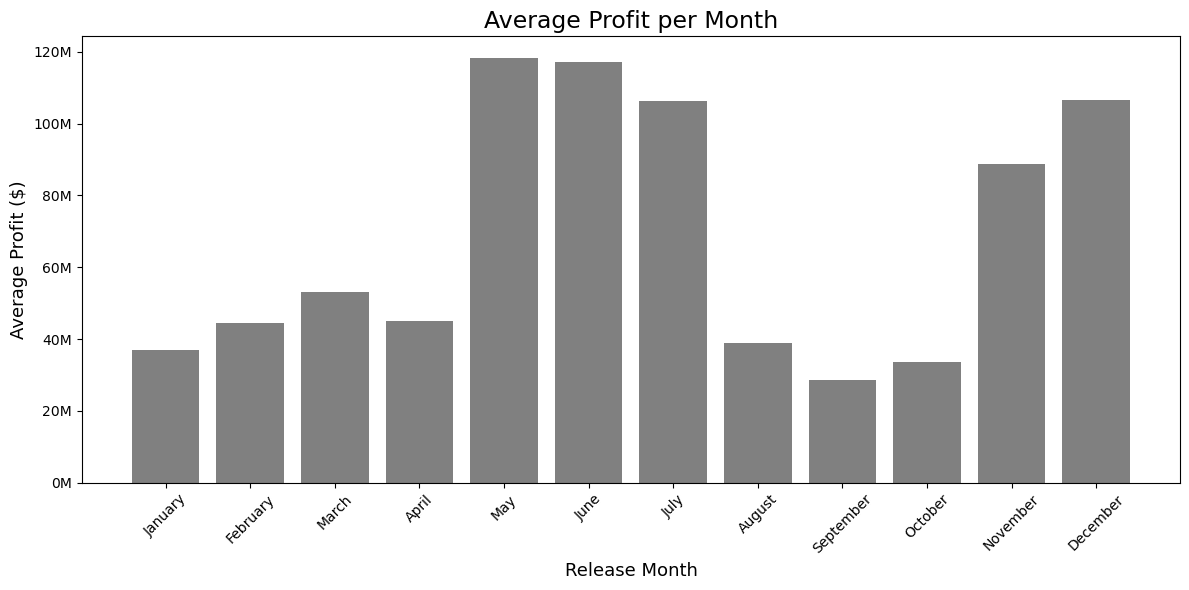

In [101]:
#Plot average profit of movie industry by month

# Group by month
avg_profit_per_month = (
    df1.groupby('release_month')[['profit']]
       .mean()
       .reset_index()
)

# Use categorical type to enforce calendar order
months_ordered = [
    'January','February','March','April','May','June',
    'July','August','September','October','November','December'
]

avg_profit_per_month['release_month'] = pd.Categorical(
    avg_profit_per_month['release_month'], 
    categories=months_ordered, 
    ordered=True
)

# Sort by the defined order
avg_profit_per_month = avg_profit_per_month.sort_values('release_month')

#Barplot
plt.figure(figsize=(12,6))
plt.bar(
    avg_profit_per_month['release_month'], 
    avg_profit_per_month['profit'], 
    color='grey'
)

# Add titles and labels
plt.xlabel("Release Month", fontsize=13)
plt.ylabel("Average Profit ($)", fontsize=13)
plt.title("Average Profit per Month", fontsize=17)
plt.xticks(rotation=45)

# Format y-axis in millions
plt.gca().yaxis.set_major_formatter(
    ticker.FuncFormatter(lambda y, pos: f'{y/1e6:.0f}M')
)

plt.tight_layout()
plt.show()

### Average profit of each genre 

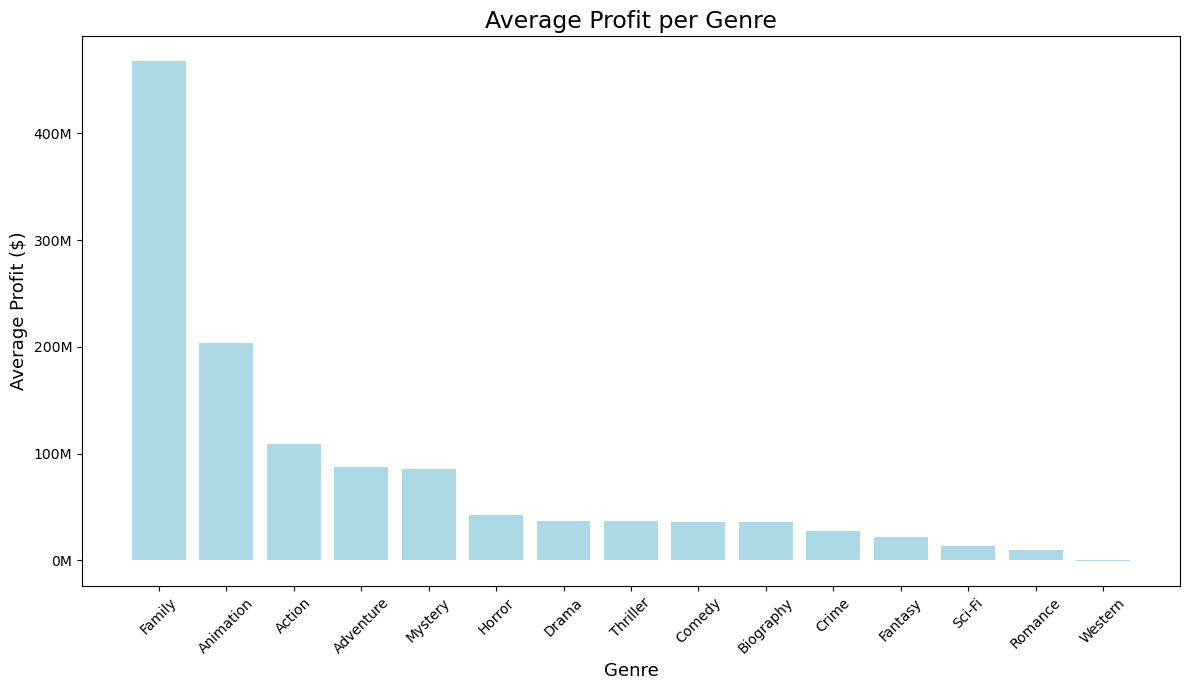

In [102]:
#Average profit of each genre 
avg_profit_per_genre = ( 
              df1.groupby('genre')[['profit']]
                 .mean()
                 .sort_values(by='profit', ascending=False)
)   

#Barplot 
plt.figure(figsize=(12,7)) 
plt.bar(
    avg_profit_per_genre.index, 
    avg_profit_per_genre['profit'], 
    color='lightblue'
) 

# Add titles and labels
plt.xlabel('Genre', fontsize=13) 
plt.ylabel('Average Profit ($)',fontsize=13) 
plt.title('Average Profit per Genre',fontsize=17) 
plt.xticks(rotation=45) 

# Format y-axis in millions
plt.gca().yaxis.set_major_formatter(
    ticker.FuncFormatter(lambda y, pos: f'{y/1e6:.0f}M')
)

plt.tight_layout()
plt.show()

### Runtime of each Genre

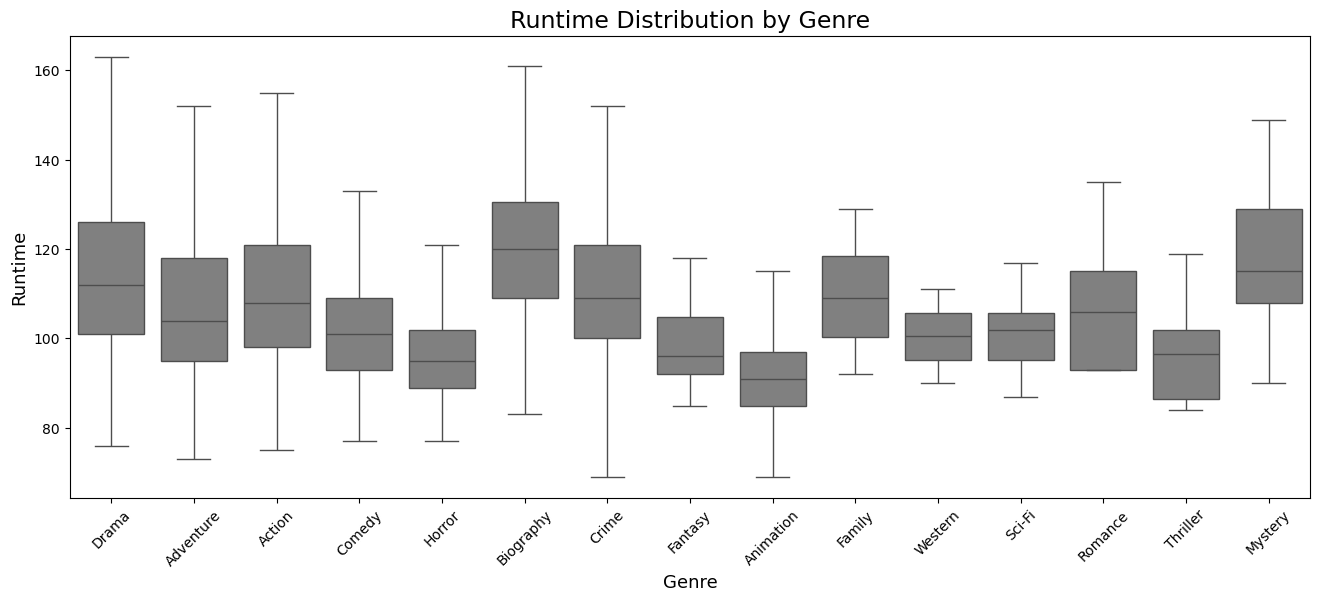

In [103]:
#Runtime of each Genre

#Boxplot
plt.figure(figsize=(16,6))
sns.boxplot(
    x='genre', 
    y='runtime', 
    data=df1, 
    showfliers=False, 
    color= 'grey'
)

# Add titles and labels
plt.xlabel('Genre', fontsize=13)
plt.ylabel('Runtime',fontsize=13)
plt.xticks(rotation=45)
plt.title("Runtime Distribution by Genre", fontsize=17)
plt.show()

Correlation coefficient (r): 0.28
Probability value (p): 3.520862576923664e-95


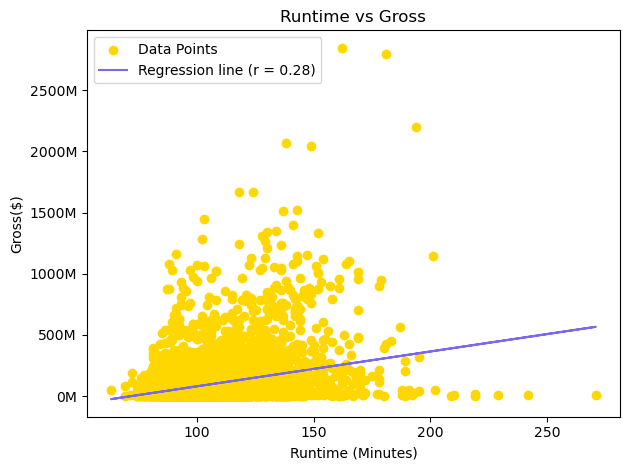

In [104]:
#Assign Values for duration and worldwide gross
duration = df1['runtime']
worldwide_gross = df1['gross']

#Perform Linear Regression
slope, intercept, r_value, p_value, std_err = linregress(duration, worldwide_gross)

# Calculate regression line values
regression_line = slope * duration + intercept

# Calculate the regression line values
print(f'Correlation coefficient (r): {r_value:.2f}')

#Print p-value
print(f'Probability value (p): {p_value}')

#Create Scatterplot
plt.scatter(
    duration, 
    worldwide_gross, 
    color='gold', 
    label ='Data Points'
)

plt.plot(
    duration, 
    regression_line, 
    color ='mediumslateblue', 
    label=f'Regression line (r = {r_value:.2f})'
)

# Add titles and labels
plt.xlabel('Runtime (Minutes)')
plt.ylabel('Gross($)')
plt.title ('Runtime vs Gross')

# Format y-axis in millions
plt.gca().yaxis.set_major_formatter(
    ticker.FuncFormatter(lambda y, pos: f'{y/1e6:.0f}M')
)

plt.tight_layout()
plt.legend()
plt.show()

Probability value (p): 0.0


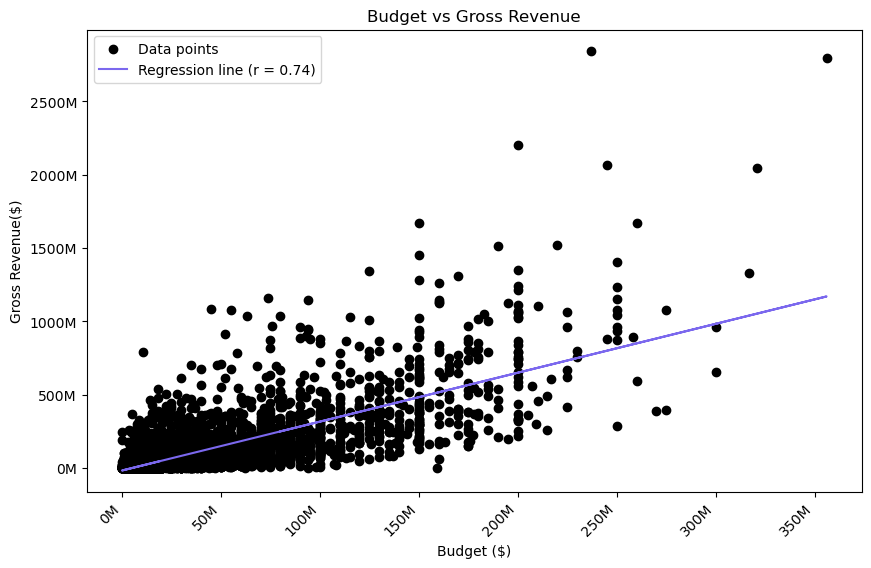

In [105]:
#Budget vs Gross

# Perform linear regression using scipy
slope, intercept, r_value, p_value, std_err = linregress(df1['budget'], df1['gross'])

# Calculate the regression line values
regression_line1 = slope * df1['budget'] + intercept

#Print p-value
print(f'Probability value (p): {p_value}')

# Plot the scatter plot
plt.figure(figsize=(10,6))
plt.scatter(
    df1['budget'], 
    df1['gross'], 
    color='black', 
    label='Data points'
)

plt.plot(
    df1['budget'], 
    regression_line1, 
    color='mediumslateblue', 
    label=f'Regression line (r = {r_value:.2f})'
)

# Add titles and labels
plt.title('Budget vs Gross Revenue')
plt.xlabel('Budget ($)')
plt.ylabel('Gross Revenue($)') 
plt.xticks(rotation=45, ha='right')

# Format y-axis and x-axis in millions
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x/1e6:.0f}M'))
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, pos: f'{y/1e6:.0f}M'))

plt.legend()
plt.show()

### Hypothesis Test (Do High-Budget Movies Have Higher ROI?)

In [106]:
#Null Hypothesis (H₀): High-budget movies do not have higher ROI than low-budget movies.

#Alternative Hypothesis (H₁): High-budget movies have higher ROI than low-budget movies.

#Significant value = 0.05

In [107]:
# Split data into high-budget and low-budget groups
median_budget = df1['budget'].median()
high_budget = df1[df1['budget'] >= median_budget]['roi']
low_budget = df1[df1['budget'] < median_budget]['roi']


In [108]:
# Run two-sided test first
t_stat, p_val_two_sided = stats.ttest_ind(high_budget, low_budget, equal_var=False)
print("T-statistic:", t_stat)
print("Two-sided P-value:", p_val_two_sided)

T-statistic: -1.6478561523049002
Two-sided P-value: 0.09949913133452995


In [109]:
# Convert to one-sided p-value
if t_stat > 0:
    p_val_one_sided = p_val_two_sided / 2
else:
    p_val_one_sided = 1 - (p_val_two_sided / 2)

print("One-sided P-value:", p_val_one_sided)

One-sided P-value: 0.950250434332735


In [110]:
#Result
if p_val_one_sided < 0.05:
    print("Reject H₀ → High-budget movies earn significantly more ROI than low-budget movies.")
else:
    print("Fail to reject H₀ → No significant evidence that high-budget movies earn higher ROI.")

Fail to reject H₀ → No significant evidence that high-budget movies earn higher ROI.


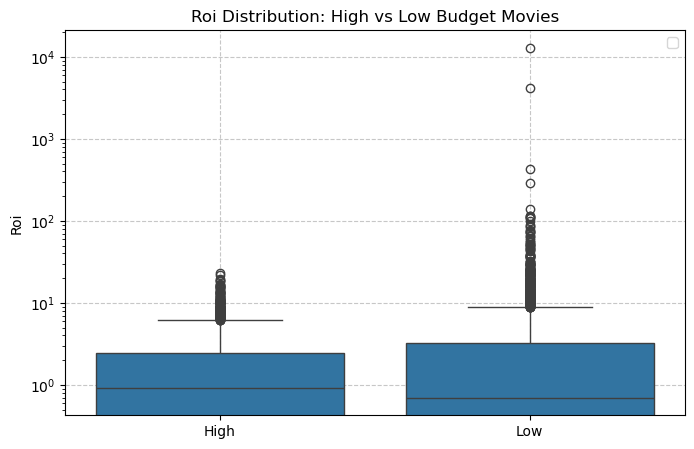

In [111]:
#Plot
plt.figure(figsize=(8,5))
sns.boxplot(x=['High']*len(high_budget) + ['Low']*len(low_budget), 
            y=pd.concat([high_budget, low_budget]))
plt.title("Roi Distribution: High vs Low Budget Movies")
plt.ylabel("Roi")
plt.grid(True, linestyle='--', alpha=0.7)
plt.yscale("log")
plt.legend()
plt.show()

#### Interpretation: 
##### We fail to reject H₀. There is no statistical evidence that high-budget movies earn higher ROI than low-budget movies. In fact, the negative t-statistic indicates that the mean ROI for high-budget films is slightly lower, though not significantly so.
#### Conclusion:
##### High-budget movies may bring larger absolute profits, but ROI efficiency is not higher than low-budget films.

In [64]:
df1.to_excel("cleaned_movies.xlsx", index=False)

In [65]:
import os

print(os.getcwd())

C:\Users\ajoal
